In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier

# Build Dataset:

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [3]:
def build_dataset(X, y, shuffle=False, BATCH_SIZE=1024):
    BUFFER_SIZE = len(y)
    X = tf.cast(X[...,tf.newaxis]/255, tf.float32)
    y = tf.cast(y,tf.int64)
    dataset = tf.data.Dataset.from_tensor_slices((X, y))
    if shuffle:
        dataset = dataset.shuffle(BUFFER_SIZE)
    dataset = dataset.batch(BATCH_SIZE)
    return dataset

In [4]:
train_ds = build_dataset(X_train, y_train)
valid_ds = build_dataset(X_valid, y_valid)
test_ds = build_dataset(X_test, y_test)

# LeNet-5 Model:

In [5]:
class LeNet5(tf.keras.Model):
    def __init__(self, dropout=0.25):
        super(LeNet5, self).__init__()
        self.dropout = dropout
        self.conv1 = tf.keras.layers.Conv2D(filters=6, 
                                            kernel_size=(3, 3), 
                                            activation='relu')
        self.pool1 = tf.keras.layers.AveragePooling2D()
        self.conv2 = tf.keras.layers.Conv2D(filters=16, 
                                            kernel_size=(3, 3), 
                                            activation='relu')
        self.pool2 = tf.keras.layers.AveragePooling2D()
        self.fc1 = tf.keras.layers.Dense(units=120, activation='relu')
        self.fc2 = tf.keras.layers.Dense(units=84, activation='relu')
        self.fc3 = tf.keras.layers.Dense(units=10)
        self.drop1 = tf.keras.layers.Dropout(self.dropout)
        self.drop2 = tf.keras.layers.Dropout(self.dropout)

    def call(self, inputs, training=False):
        outputs = self.conv1(inputs)
        outputs = self.pool1(outputs)
        outputs = self.conv2(outputs)
        outputs = self.pool2(outputs)
        outputs = tf.keras.layers.Flatten()(outputs)
        outputs = self.drop1(self.fc1(outputs), training=training)
        outputs = self.drop2(self.fc2(outputs), training=training)
        outputs = self.fc3(outputs)
        return outputs

In [6]:
model = LeNet5()
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
cp_cb = tf.keras.callbacks.ModelCheckpoint(filepath='model/model.ckpt',
                                           save_best_only=True,
                                           save_weights_only=True,
                                           verbose=1)

In [7]:
history = model.fit(train_ds, validation_data=valid_ds, epochs=100, callbacks=[cp_cb])

Train for 47 steps, validate for 12 steps
Epoch 1/100
40/47 [========================>.....] - ETA: 0s - loss: 1.6838 - accuracy: 0.4808
Epoch 00001: val_loss improved from inf to 0.55990, saving model to model/model.ckpt
47/47 [==============================] - 3s 58ms/step - loss: 1.5540 - accuracy: 0.5176 - val_loss: 0.5599 - val_accuracy: 0.8346
Epoch 2/100
40/47 [========================>.....] - ETA: 0s - loss: 0.5750 - accuracy: 0.8170
Epoch 00002: val_loss improved from 0.55990 to 0.32186, saving model to model/model.ckpt
47/47 [==============================] - 0s 8ms/step - loss: 0.5556 - accuracy: 0.8234 - val_loss: 0.3219 - val_accuracy: 0.9015
Epoch 3/100
40/47 [========================>.....] - ETA: 0s - loss: 0.3937 - accuracy: 0.8782
Epoch 00003: val_loss improved from 0.32186 to 0.23651, saving model to model/model.ckpt
47/47 [==============================] - 0s 8ms/step - loss: 0.3854 - accuracy: 0.8810 - val_loss: 0.2365 - val_accuracy: 0.9268
Epoch 4/100
39/47 [===

Epoch 28/100
39/47 [=======================>......] - ETA: 0s - loss: 0.0624 - accuracy: 0.9810
Epoch 00028: val_loss improved from 0.05782 to 0.05679, saving model to model/model.ckpt
47/47 [==============================] - 0s 8ms/step - loss: 0.0607 - accuracy: 0.9817 - val_loss: 0.0568 - val_accuracy: 0.9852
Epoch 29/100
40/47 [========================>.....] - ETA: 0s - loss: 0.0588 - accuracy: 0.9813
Epoch 00029: val_loss improved from 0.05679 to 0.05424, saving model to model/model.ckpt
47/47 [==============================] - 0s 8ms/step - loss: 0.0576 - accuracy: 0.9814 - val_loss: 0.0542 - val_accuracy: 0.9846
Epoch 30/100
41/47 [=========================>....] - ETA: 0s - loss: 0.0569 - accuracy: 0.9832
Epoch 00030: val_loss improved from 0.05424 to 0.05401, saving model to model/model.ckpt
47/47 [==============================] - 0s 8ms/step - loss: 0.0559 - accuracy: 0.9833 - val_loss: 0.0540 - val_accuracy: 0.9843
Epoch 31/100
41/47 [=========================>....] - ETA:

40/47 [========================>.....] - ETA: 0s - loss: 0.0322 - accuracy: 0.9896
Epoch 00056: val_loss did not improve from 0.04522
47/47 [==============================] - 0s 8ms/step - loss: 0.0310 - accuracy: 0.9900 - val_loss: 0.0466 - val_accuracy: 0.9892
Epoch 57/100
41/47 [=========================>....] - ETA: 0s - loss: 0.0305 - accuracy: 0.9901
Epoch 00057: val_loss did not improve from 0.04522
47/47 [==============================] - 0s 8ms/step - loss: 0.0294 - accuracy: 0.9904 - val_loss: 0.0458 - val_accuracy: 0.9885
Epoch 58/100
40/47 [========================>.....] - ETA: 0s - loss: 0.0293 - accuracy: 0.9908
Epoch 00058: val_loss did not improve from 0.04522
47/47 [==============================] - 0s 8ms/step - loss: 0.0288 - accuracy: 0.9909 - val_loss: 0.0487 - val_accuracy: 0.9879
Epoch 59/100
41/47 [=========================>....] - ETA: 0s - loss: 0.0286 - accuracy: 0.9909
Epoch 00059: val_loss did not improve from 0.04522
47/47 [==============================]

Epoch 86/100
41/47 [=========================>....] - ETA: 0s - loss: 0.0187 - accuracy: 0.9942
Epoch 00086: val_loss did not improve from 0.04520
47/47 [==============================] - 0s 8ms/step - loss: 0.0185 - accuracy: 0.9943 - val_loss: 0.0501 - val_accuracy: 0.9883
Epoch 87/100
41/47 [=========================>....] - ETA: 0s - loss: 0.0173 - accuracy: 0.9945
Epoch 00087: val_loss did not improve from 0.04520
47/47 [==============================] - 0s 8ms/step - loss: 0.0171 - accuracy: 0.9947 - val_loss: 0.0528 - val_accuracy: 0.9884
Epoch 88/100
40/47 [========================>.....] - ETA: 0s - loss: 0.0195 - accuracy: 0.9939
Epoch 00088: val_loss did not improve from 0.04520
47/47 [==============================] - 0s 8ms/step - loss: 0.0185 - accuracy: 0.9942 - val_loss: 0.0508 - val_accuracy: 0.9887
Epoch 89/100
41/47 [=========================>....] - ETA: 0s - loss: 0.0181 - accuracy: 0.9942
Epoch 00089: val_loss did not improve from 0.04520
47/47 [==================

# Predictions:

In [8]:
model.load_weights('model/model.ckpt')
model.trainable = False

In [25]:
train_pred = model.predict(train_ds)
test_pred = model.predict(test_ds)

In [10]:
def get_report(y_true, y_pred):
    report = classification_report(y_true, y_pred, digits=4, output_dict=True)
    report = pd.DataFrame(report).transpose()
    return report

In [27]:
train_report = get_report(y_train, train_pred.argmax(1))
train_report.to_csv('reports/cnn-train.csv')
test_report = get_report(y_test, test_pred.argmax(1))
test_report.to_csv('reports/cnn-test.csv')
test_report

,precision,recall,f1-score,support
0,0.990872,0.996939,0.993896,980.0000
1,0.991220,0.994714,0.992964,1135.0000
2,0.991279,0.991279,0.991279,1032.0000
3,0.983333,0.993069,0.988177,1010.0000
4,0.988810,0.989817,0.989313,982.0000
5,0.993205,0.983184,0.988169,892.0000
6,0.991623,0.988518,0.990068,958.0000
7,0.989279,0.987354,0.988315,1028.0000
8,0.988625,0.981520,0.985059,974.0000
9,0.985134,0.985134,0.985134,1009.0000


In [61]:
def get_cls_acc(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    return pd.Series(cm.diagonal()/cm.sum(axis=1))

In [62]:
train_cls_acc = get_cls_acc(y_train, train_pred.argmax(1))
test_cls_acc = get_cls_acc(y_test, test_pred.argmax(1))

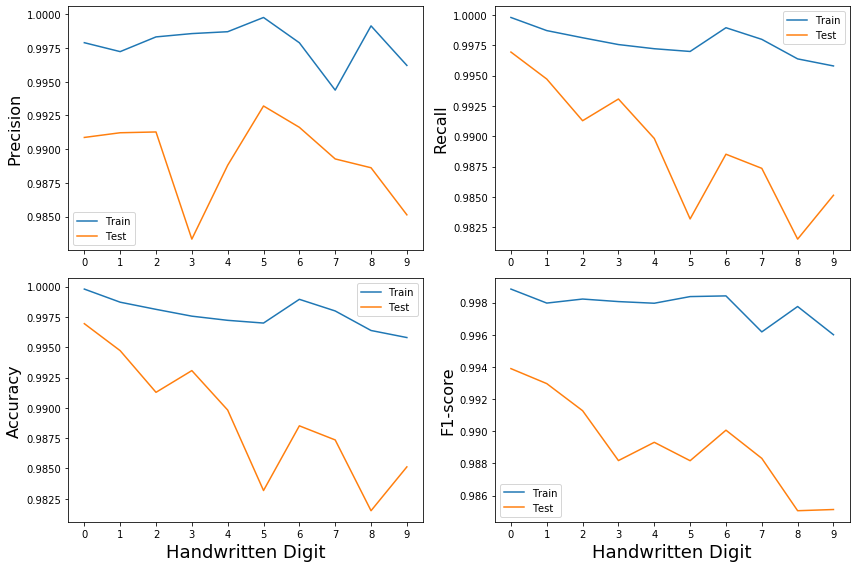

In [71]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8))
ax[0, 0].plot(train_report['precision'][:10], label='Train')
ax[0, 0].plot(test_report['precision'][:10], label='Test')
ax[0, 0].set_ylabel('Precision', fontsize=16)
ax[0, 0].legend()
ax[0, 1].plot(train_report['recall'][:10], label='Train')
ax[0, 1].plot(test_report['recall'][:10], label='Test')
ax[0, 1].set_ylabel('Recall', fontsize=16)
ax[0, 1].legend()
ax[1, 1].plot(train_report['f1-score'][:10], label='Train')
ax[1, 1].plot(test_report['f1-score'][:10], label='Test')
ax[1, 1].set_xlabel('Handwritten Digit', fontsize=18)
ax[1, 1].set_ylabel('F1-score', fontsize=16)
ax[1, 1].legend()
ax[1, 0].plot(train_cls_acc, label='Train')
ax[1, 0].plot(test_cls_acc, label='Test')
ax[1, 0].set_xlabel('Handwritten Digit', fontsize=18)
ax[1, 0].set_ylabel('Accuracy', fontsize=16)
ax[1, 0].legend()
ax[1, 0].set_xticks(np.arange(10))
plt.tight_layout()
fig.savefig('images/cnn.png', format='png', dpi=300)
plt.show()

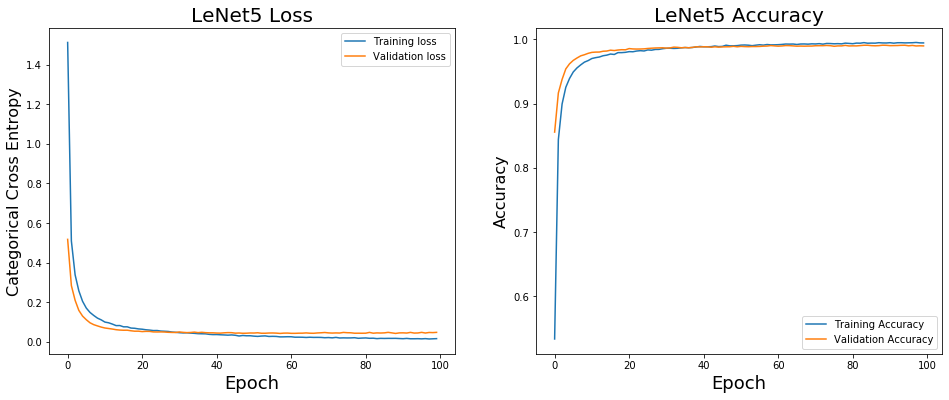

In [92]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].plot(history.history['loss'], label='Training loss')
ax[0].plot(history.history['val_loss'], label='Validation loss')
ax[1].plot(history.history['accuracy'], label='Training Accuracy')
ax[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
ax[0].set_title('LeNet5 Loss', fontsize=20)
ax[0].set_xlabel('Epoch', fontsize=18)
ax[0].set_ylabel('Categorical Cross Entropy', fontsize=16)
ax[1].set_title('LeNet5 Accuracy', fontsize=20)
ax[1].set_xlabel('Epoch', fontsize=18)
ax[1].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
ax[1].legend()
fig.savefig('images/loss.png', format='png', dpi=300)

# t-SNE Plot:

In [125]:
test_tsne = TSNE(n_components=2).fit_transform(y_pred)

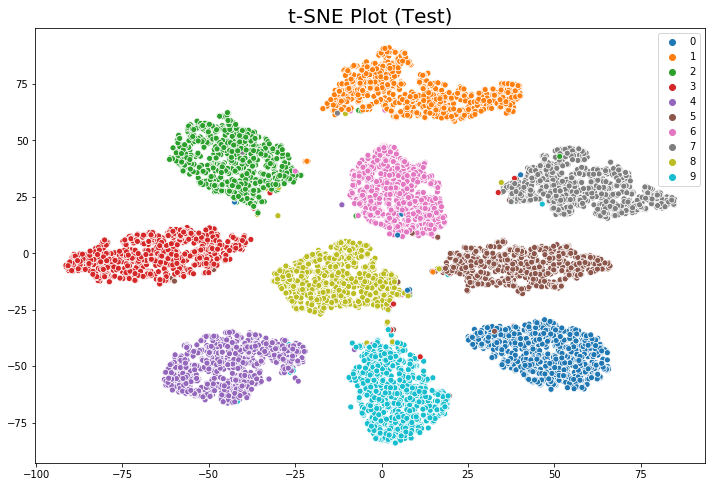

In [153]:
fig, ax = plt.subplots(figsize=(12, 8))
palette = sns.color_palette(None, 10)
sns.scatterplot(test_tsne[:,0], test_tsne[:,1], hue=y_test, palette=palette)
ax.set_title('t-SNE Plot (Test)', fontsize=20)
fig.savefig('images/tsne.png', format='png', dpi=300)